In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


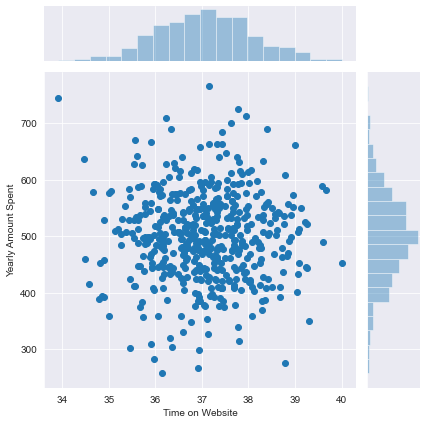

In [6]:
sns.set_style('darkgrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

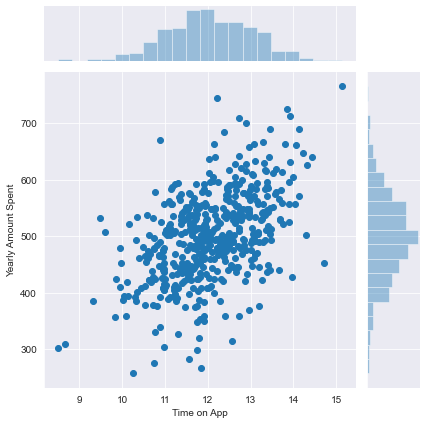

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

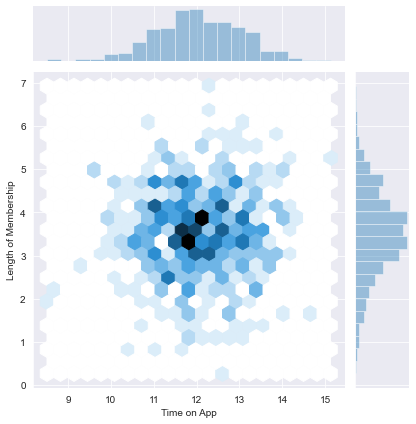

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

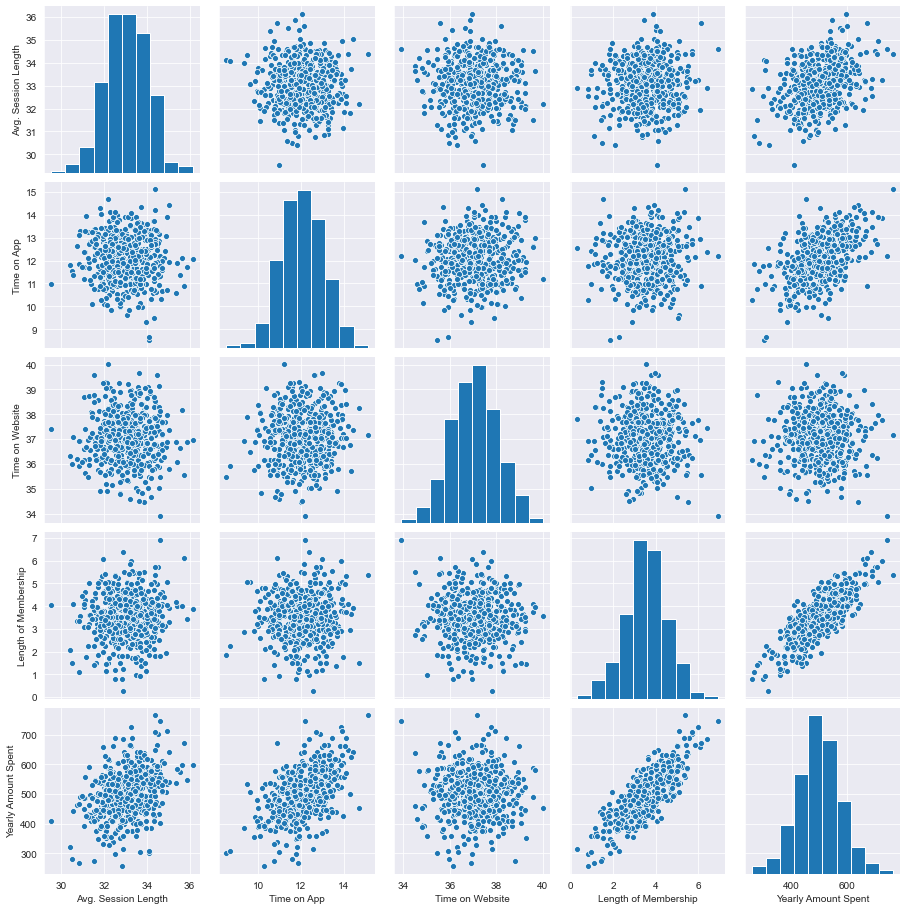

In [9]:
sns.pairplot(customers)

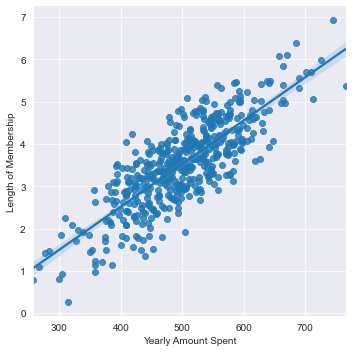

In [10]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [19]:
predictions = lm.predict(X_test)

Text(26.125, 0.5, 'Prediction values')

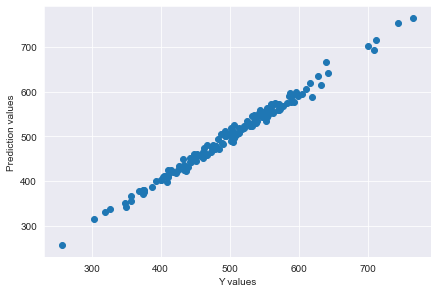

In [20]:
plt.scatter(x=y_test,y=predictions)
plt.tight_layout()
plt.xlabel('Y values')
plt.ylabel('Prediction values')

In [21]:
from sklearn import metrics

In [22]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430838
MSE:  79.81305165097461
RMSE:  8.933815066978642


In [23]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

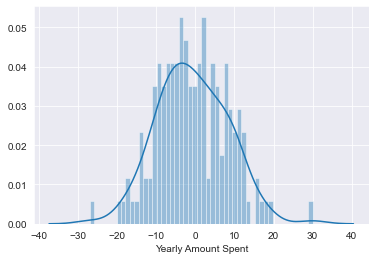

In [24]:
sns.distplot(y_test-predictions,bins=50)

In [25]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [26]:
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097




Since, we can see that 1 unit increase in Time on App *(keeping other features fixed)* is associated with an increase of <b>38.59</b> total dollars spent while 1 unit increase in Time on Website *(keeping other features fixed)* is associated with an increase of <b>0.19</b> total dollars spent only. 
So if the company focus more on their App instead of website, it can result in increase of sales of the company.


